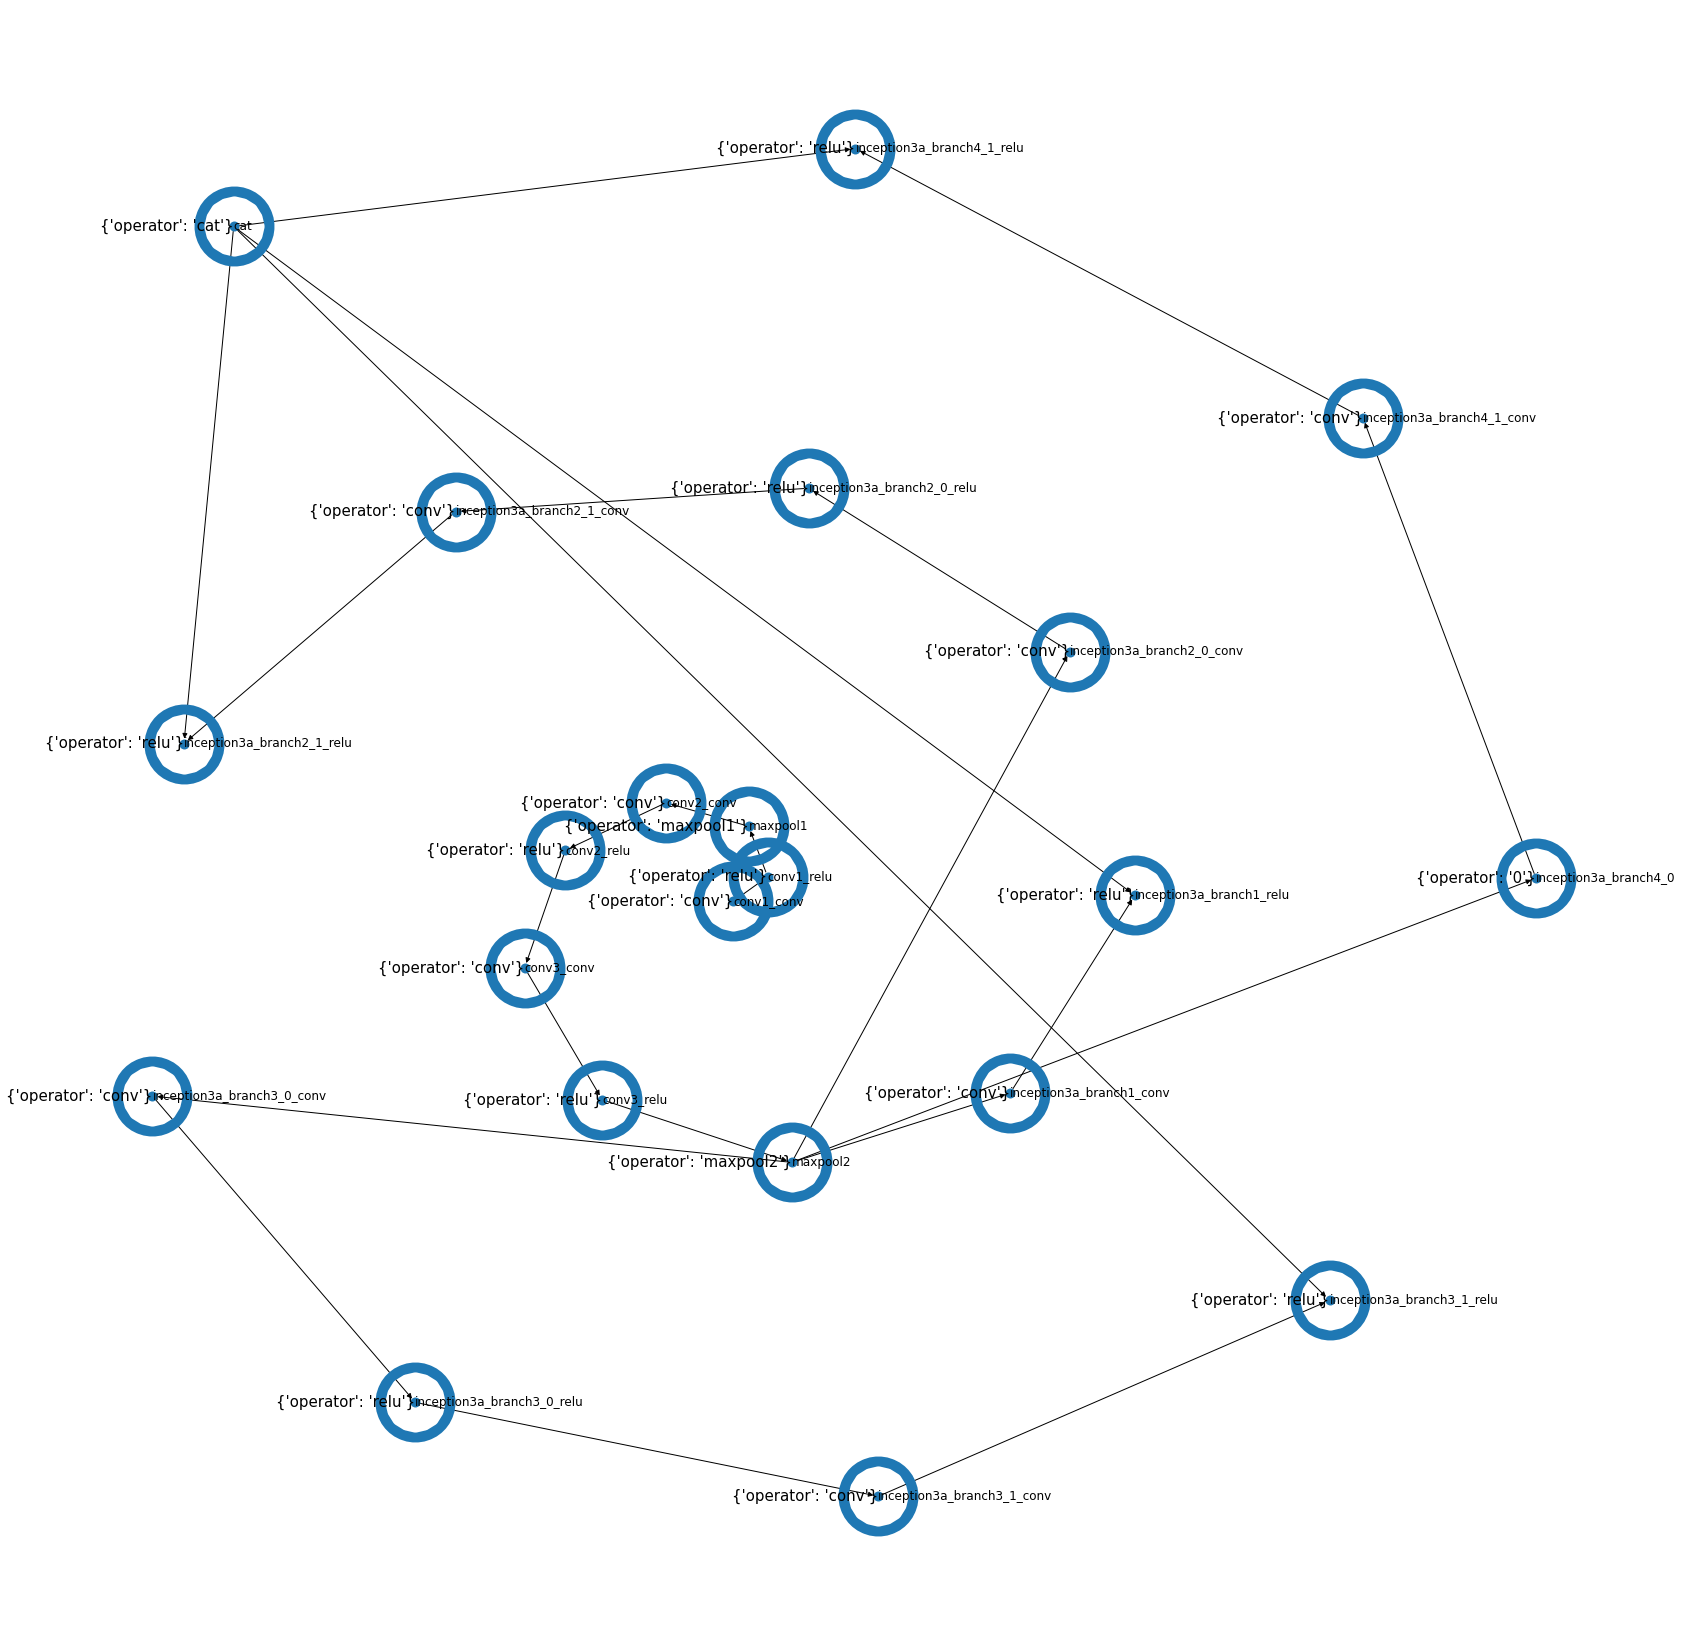

In [2]:
#from info get graph
from torch.fx import symbolic_trace
from dnn_models.GoogleNet import *
from torchvision.models.feature_extraction import get_graph_node_names
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
# import tqam


model = GoogLeNet()
gm = symbolic_trace(model)
# gm.graph.print_tabular()
# print(gm.code)

# train_nodes, eval_nodes = get_graph_node_names(model)
# print(train_nodes,eval_nodes)
a = [{'name': 'conv1_conv', 'operator': 'conv', 'users': 1, 'args': []},
 {'name': 'conv1_relu', 'operator': 'relu', 'users': 1, 'args': ['conv1_conv']},
 {'name': 'maxpool1', 'operator': 'maxpool1', 'users': 1, 'args': ['conv1_relu']},
 {'name': 'conv2_conv', 'operator': 'conv', 'users': 1, 'args': ['maxpool1']},
 {'name': 'conv2_relu', 'operator': 'relu', 'users': 1, 'args': ['conv2_conv']},
 {'name': 'conv3_conv', 'operator': 'conv', 'users': 1, 'args': ['conv2_relu']},
 {'name': 'conv3_relu', 'operator': 'relu', 'users': 1, 'args': ['conv3_conv']},
 {'name': 'maxpool2', 'operator': 'maxpool2', 'users': 4, 'args': ['conv3_relu']},
 {'name': 'inception3a_branch1_conv', 'operator': 'conv', 'users': 1, 'args': ['maxpool2']},
 {'name': 'inception3a_branch1_relu', 'operator': 'relu', 'users': 1, 'args': ['inception3a_branch1_conv']},
 {'name': 'inception3a_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['maxpool2']},
 {'name': 'inception3a_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['inception3a_branch2_0_conv']},
 {'name': 'inception3a_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['inception3a_branch2_0_relu']},
 {'name': 'inception3a_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['inception3a_branch2_1_conv']},
 {'name': 'inception3a_branch3_0_conv', 'operator': 'conv', 'users': 1, 'args': ['maxpool2']},
 {'name': 'inception3a_branch3_0_relu', 'operator': 'relu', 'users': 1, 'args': ['inception3a_branch3_0_conv']},
 {'name': 'inception3a_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['inception3a_branch3_0_relu']},
 {'name': 'inception3a_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['inception3a_branch3_1_conv']},
 {'name': 'inception3a_branch4_0', 'operator': '0', 'users': 1, 'args': ['maxpool2']},
 {'name': 'inception3a_branch4_1_conv', 'operator': 'conv', 'users': 1, 'args': ['inception3a_branch4_0']},
 {'name': 'inception3a_branch4_1_relu', 'operator': 'relu', 'users': 1, 'args': ['inception3a_branch4_1_conv']},
 {'name': 'cat', 'operator': 'cat', 'users': 1, 'args': ['inception3a_branch1_relu', 'inception3a_branch2_1_relu', 'inception3a_branch3_1_relu', 'inception3a_branch4_1_relu']}]
# df = pd.DataFrame(a)
key1 = []
key2 = []
key3 = []
for k in a:
    if len(k['args']) == 1:
        
        key1.append(str(k['args'][0]))
        key2.append(k['name'])
        key3.append(k['operator'])
       
    
    elif len(k['args']) == 0:
        key1.append(k['name'])
        key2.append(k['name'])
        key3.append(k['operator'])
c = {'key1':key1,'key2':key2, 'key3':key3}
G = nx.from_pandas_edgelist(c, 'key1', 'key2',create_using=nx.DiGraph())
for k in a:
    if len(k['args']) > 1:
        G.add_node(k['name'])
        G.nodes[k['name']]['operator'] = k['operator']

        for i in k['args']:
            G.add_edge(str(k['name']), str(i))
for i in key2:
    G.nodes[i]['operator'] = c['key3'][c['key2'].index(i)]
# print(c['key3'].index('relu')) 
fig, ax = plt.subplots(figsize=(30,30))
pos = nx.networkx.spiral_layout(G, resolution = 0.7)
# pos = nx.networkx.shell_layou(G)
# pos = nx.networkx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, alpha=1, linewidths=70, ax=ax, horizontalalignment='left')

nx.draw_networkx_labels(G,pos,G.nodes,font_size=15,font_family='sans-serif', horizontalalignment='right')
plt.savefig("1.jpg", dpi=1000)

In [11]:
#from graph get infer process
def infer(x):
# print(G.nodes)
    for i in G.nodes:
    # print(i)
    

['conv1_conv', 'conv1_relu', 'maxpool1', 'conv2_conv', 'conv2_relu', 'conv3_conv', 'conv3_relu', 'maxpool2', 'inception3a_branch1_conv', 'inception3a_branch1_relu', 'inception3a_branch2_0_conv', 'inception3a_branch2_0_relu', 'inception3a_branch2_1_conv', 'inception3a_branch2_1_relu', 'inception3a_branch3_0_conv', 'inception3a_branch3_0_relu', 'inception3a_branch3_1_conv', 'inception3a_branch3_1_relu', 'inception3a_branch4_0', 'inception3a_branch4_1_conv', 'inception3a_branch4_1_relu', 'cat']
conv1_conv
conv1_relu
maxpool1
conv2_conv
conv2_relu
conv3_conv
conv3_relu
maxpool2
inception3a_branch1_conv
inception3a_branch1_relu
inception3a_branch2_0_conv
inception3a_branch2_0_relu
inception3a_branch2_1_conv
inception3a_branch2_1_relu
inception3a_branch3_0_conv
inception3a_branch3_0_relu
inception3a_branch3_1_conv
inception3a_branch3_1_relu
inception3a_branch4_0
inception3a_branch4_1_conv
inception3a_branch4_1_relu
cat


In [5]:
#get node info 
import re
with open("graph.txt", "r") as f:
    df = f.readlines()
nodes = []
pattern = r"   %(.+?) : \[#"
pattern1 = r"args = \((.+?)\), kwa"
for s in df[2:-1]:
    dic = dict()
    name =re.findall(pattern=pattern,string=s)[0]
    dic['name'] = name
    dic['operator'] = name.split("_")[-1]
    dic['users'] = int(s[s.find("users=")+6: s.find("] =")])
    args = re.findall(pattern=pattern1,string=s)[0]
    if args.startswith("["):
        args = args[args.find("[") + 1: args.rfind("]")]
    else:
        args = args[:-1]
    args = args.split(",")
    args = [i.replace("%","").strip() for i in args]
    if args[0] == "x":
        args = []
    dic['args'] = args
    nodes.append(dic)
nodes

FileNotFoundError: [Errno 2] No such file or directory: 'graph.txt'